## Step 1
## Install the Quandl library and register for a Quandl account as described in the Exercise.

# 6.6: Sourcing & Analyzing Time Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### Importing libraries and data

Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

`conda install quandl`

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

## Step 2 
## Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project.

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'NJpxQY_Zpsd7FnB7BBac'

In [3]:
# Importing the Federal Reserve Economic Data "Gross Domestic Product" variable.

data = quandl.get('FRED/GDP')

In [4]:
data.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [5]:
data.shape

(300, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 1947-01-01 to 2021-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


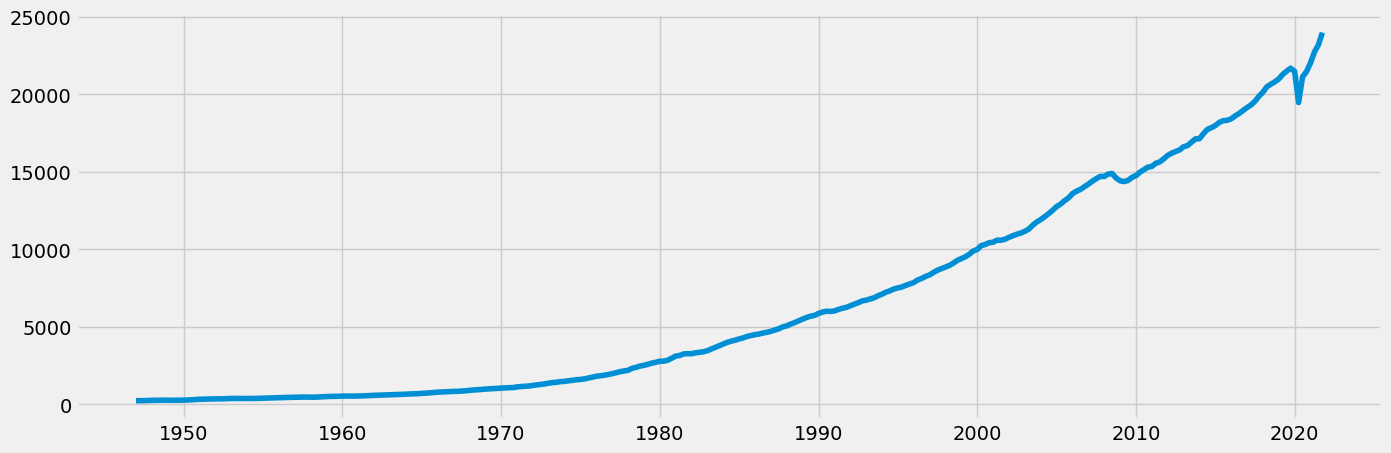

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

##  Step 3
## Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example).

### Subsetting, wrangling, and cleaning time-series data

In [10]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [11]:
data_2.tail()

,Date,Value
295,2020-10-01,21477.597
296,2021-01-01,22038.226
297,2021-04-01,22740.959
298,2021-07-01,23202.344
299,2021-10-01,23992.355


In [12]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2021-10-01')]

In [13]:
data_sub.shape

(167, 2)

In [14]:
data_sub.head()

,Date,Value
132,1980-01-01,2789.842
133,1980-04-01,2797.352
134,1980-07-01,2856.483
135,1980-10-01,2985.557
136,1981-01-01,3124.206


In [15]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 132 to 298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    167 non-null    datetime64[ns]
 1   Value   167 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [16]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206


In [17]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 1980-01-01 to 2021-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   167 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


##  Step 4 Create a line chart of your data.

Text(0.5, 1.0, 'GDP for the last 40 years')

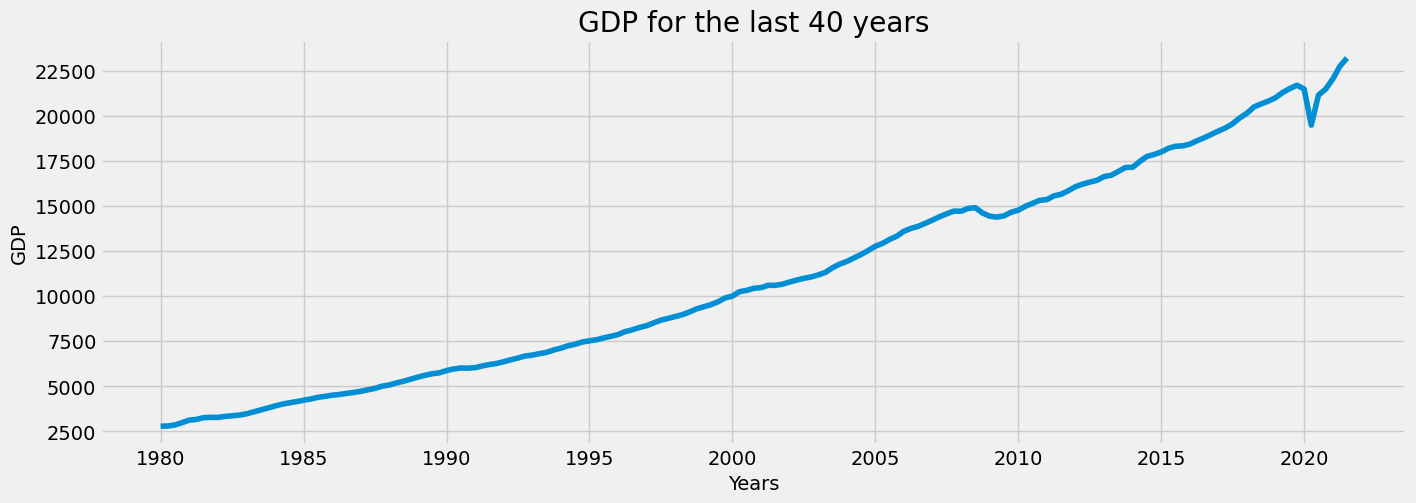

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP for the last 40 years')

In [19]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [20]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

## Step 5
## Decompose the data’s components. Analyze the results from the plot in a markdown cell.

### Time-series analysis: decomposition

In [21]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 1980-01-01 to 2021-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   167 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

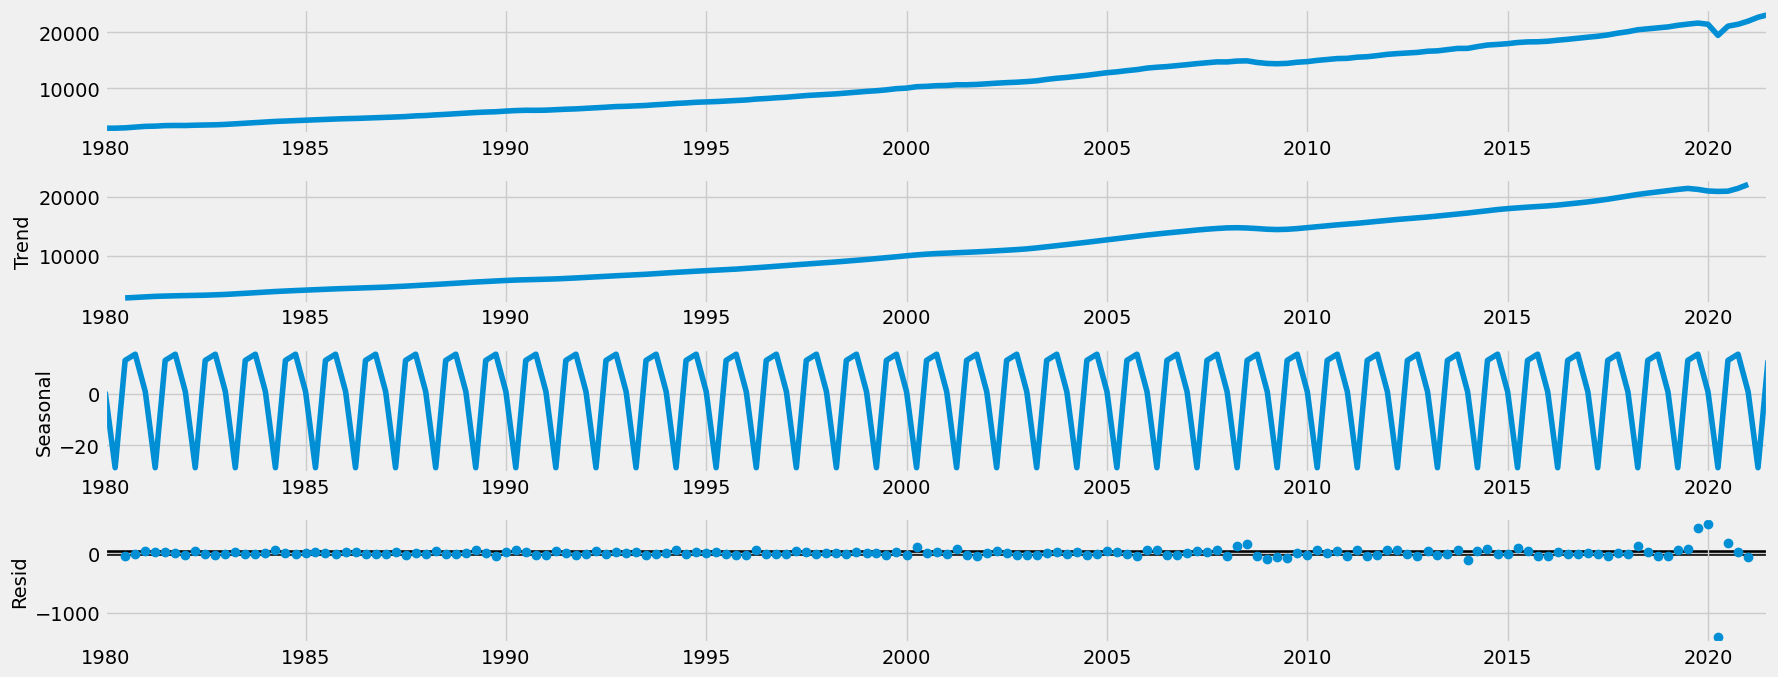

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

## Step 6 
## Conduct a Dickey-Fuller test to check for stationarity. Interpret the results in a markdown cell and reference your null hypothesis.

### Testing for stationarity

In [25]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   3.113738
p-value                          1.000000
Number of Lags Used              8.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


### 1.The p-value is 1.000000. The p-value is compared to a significance level (commonly 0.05) to determine whether to reject the null hypothesis. A p-value of 1.000000 means that you do not have enough evidence to reject the null hypothesis. It suggests that the time series is likely non-stationary.
### 2. If Test statistic larger than critical value = can’t reject null hypothesis , in our case we cannot reject null hypothesis, we have to stationarize the data

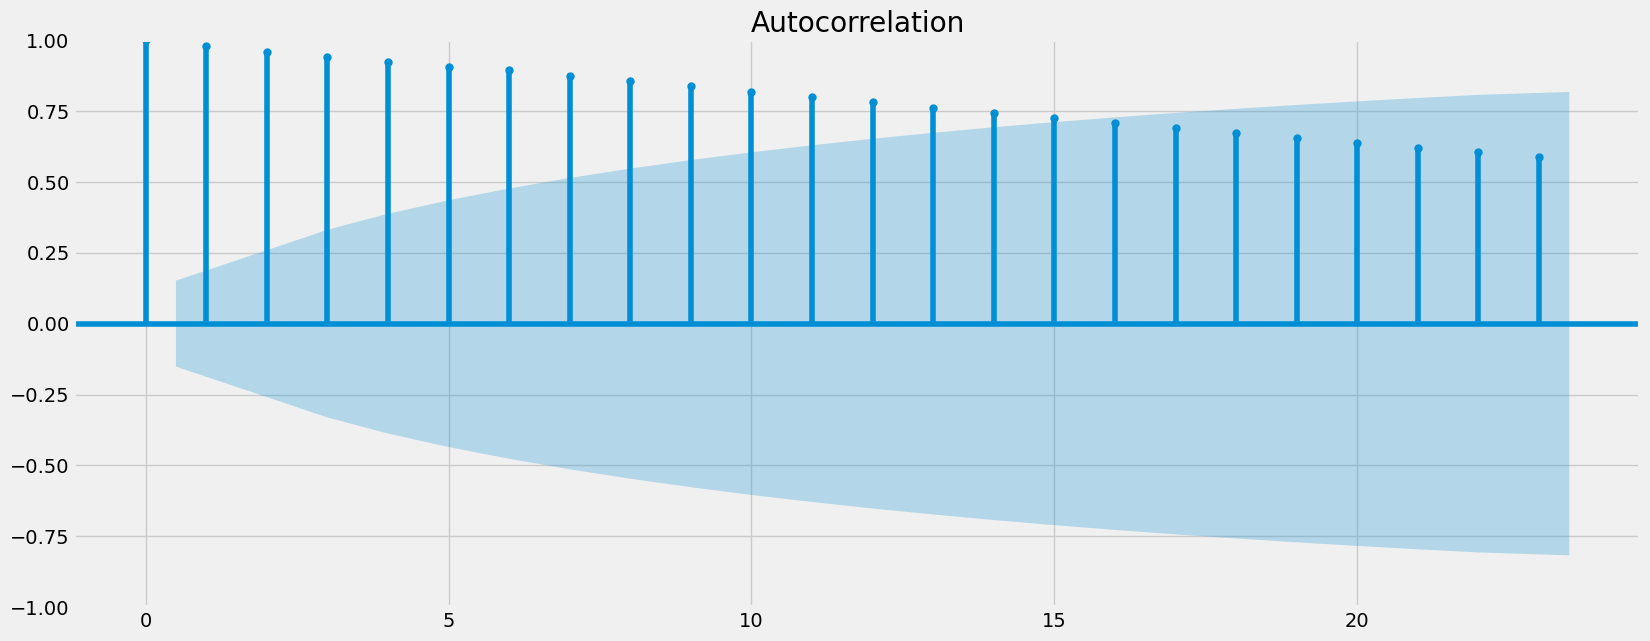

In [26]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue line of the confidence interval, this means we have lags that are significantly correlated with each other. We can deduce that our data is non-stationary. The same result we got with Dickey-Fuller Stationarity test. The both tests indicate that we have to stationarize our data.

## Step 7,8 
## If your data isn’t stationary, conduct a round of differencing on it and repeat step 6. If your data still isn’t stationary, perform another round of differencing and repeat step 6.

### Stationarizing the GDP Data

In [27]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [28]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [29]:
data_diff.head()

,Value
datetime,
1980-04-01,7.510
1980-07-01,59.131
1980-10-01,129.074
1981-01-01,138.649
1981-04-01,38.326


In [30]:
data_diff.columns

Index(['Value'], dtype='object')

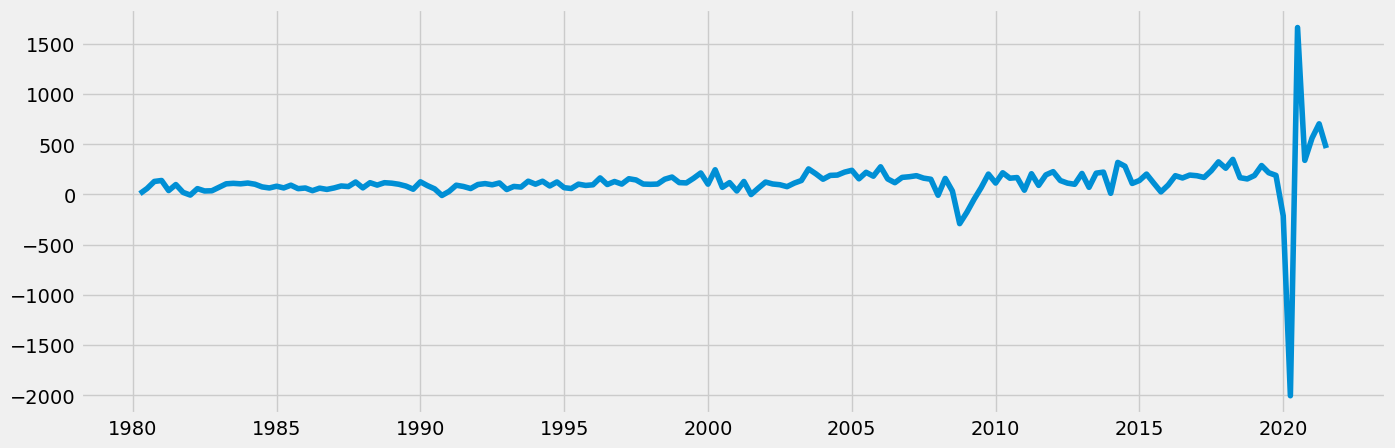

In [31]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.363996
p-value                          0.000344
Number of Lags Used              7.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


### The p-value is 0.000344. The p-value is compared to a significance level (commonly 0.05) or critical value to determine whether to reject the null hypothesis. In this case, the p-value is much smaller than 0.05, suggesting strong evidence against the null hypothesis. We would typically reject the null hypothesis in favor of the alternative hypothesis, which implies that the time series is stationary.
### The test statistic is -4.363996 in our case. More negative values of the test statistic provide stronger evidence against the null hypothesis (the hypothesis that the time series is non-stationary). In this case, the test statistic is quite negative, which is a good indication. Test statistic smaller than critical value (1%) = can reject null hypothesis

## Step 9
## Check your data’s autocorrelations.

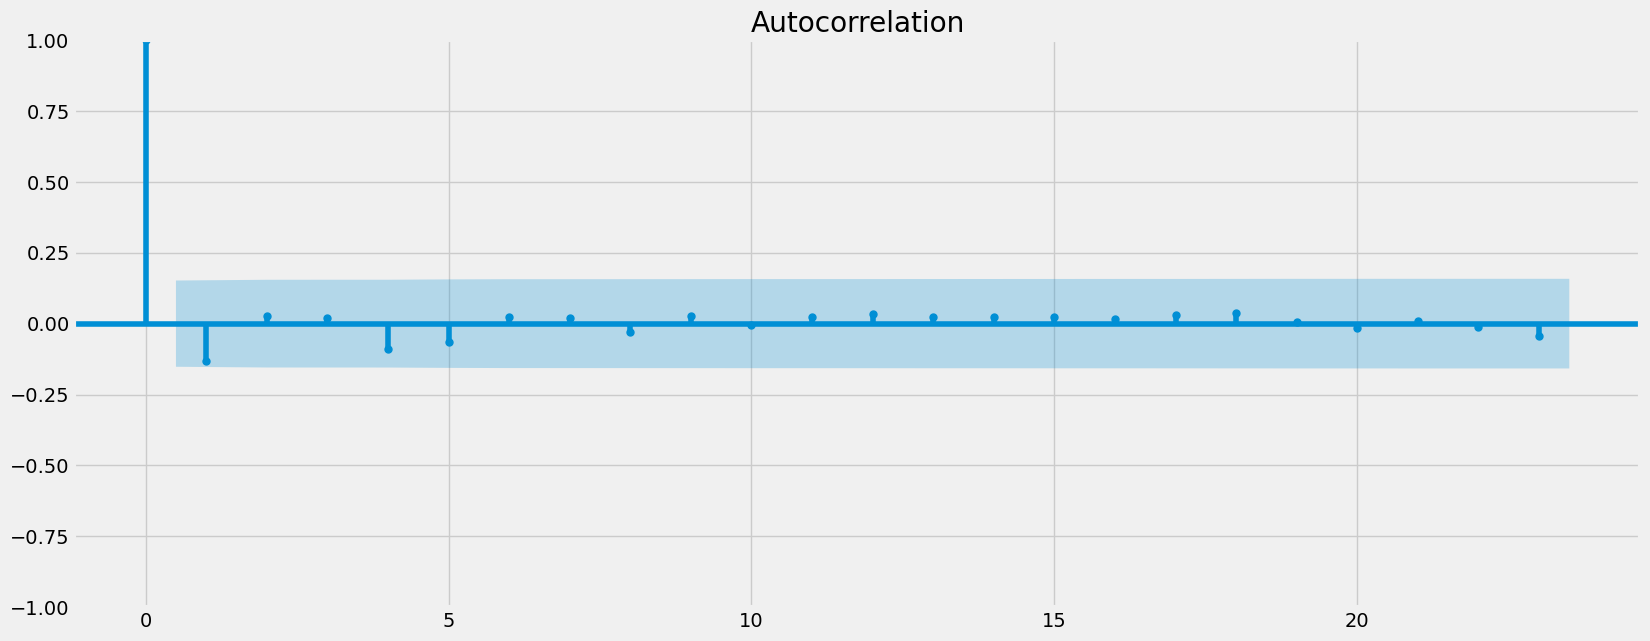

In [33]:
plot_acf(data_diff)
plt.show()

### The autocorrelation plot has improved (there are no autocorrelated terms), it indicates that that stationarity is strong.

## Bonus Task

### 1. Defining Parameters

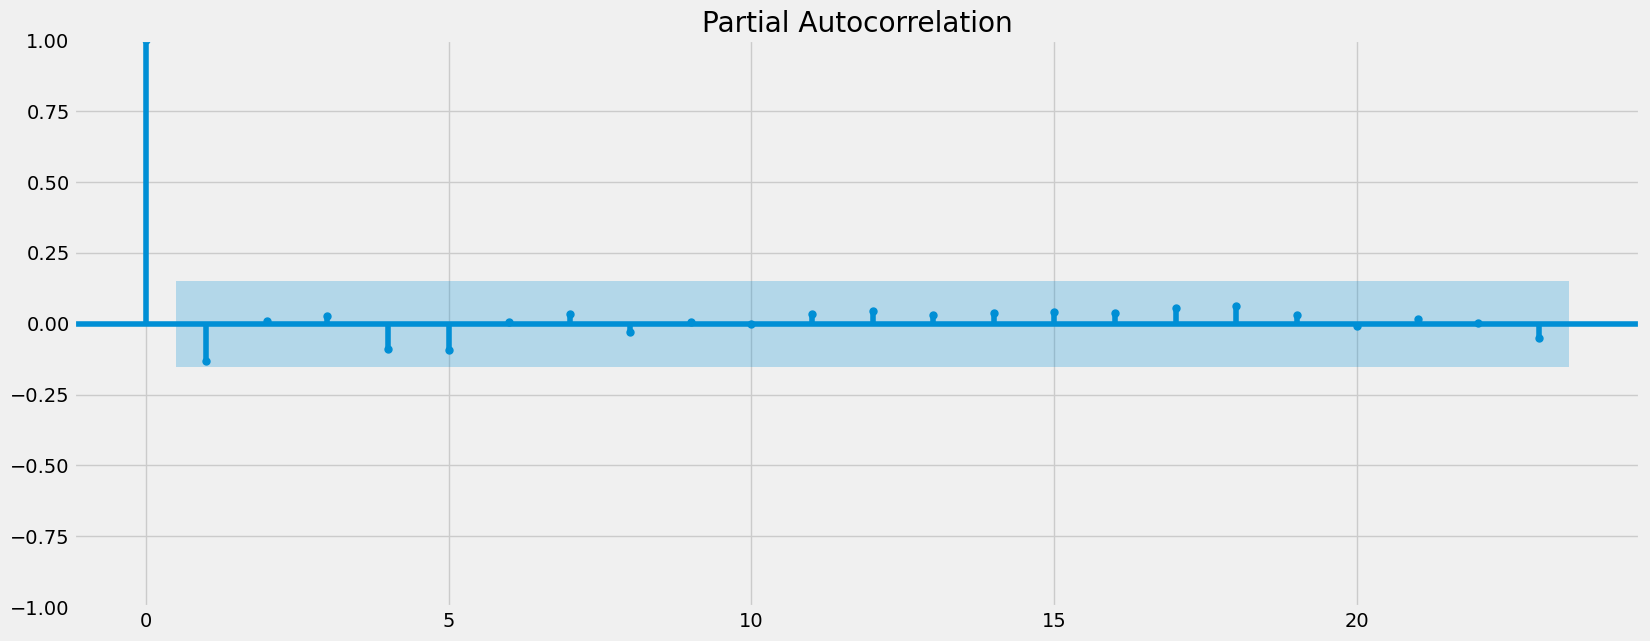

<Figure size 4500x4500 with 0 Axes>

In [34]:

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

### The autocorrelation function (ACF) and partial autocorrelation function (PACF) do not provide a clear indication of the appropriate values for the ARIMA model parameters (p and q), probably we should use (1,1) parametres.

### 2. Splitting the Data

In [48]:
data_diff.shape

(166, 1)

In [46]:
# Split the data

train = data_diff['Value'][:109]
test = data_diff['Value'][108:]

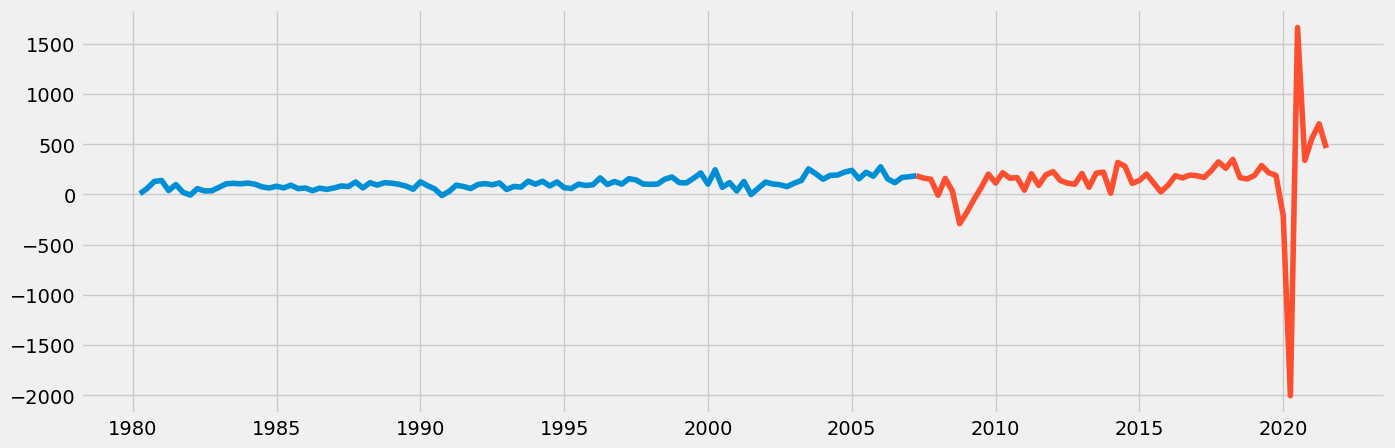

In [47]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [49]:
test.shape

(58,)

In [51]:
train.shape

(109,)

In [56]:
train.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 109 entries, 1980-04-01 to 2007-04-01
Series name: Value
Non-Null Count  Dtype  
--------------  -----  
109 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


### 3. Running and Fitting the Model

In [50]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [64]:
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  109
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -563.995
Date:                Wed, 22 Nov 2023   AIC                           1135.991
Time:                        20:25:31   BIC                           1146.756
Sample:                    04-01-1980   HQIC                          1140.356
                         - 04-01-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.9592     18.239      5.919      0.000      72.211     143.707
ar.L1          0.9247      0.050     18.454      0.000       0.826       1.023
ma.L1         -0.5883      0.112     -5.275      0.0

ValueError: too many values to unpack (expected 3)

In [62]:
model = ARIMA(train, order=(1,1,1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(41, alpha=0.05)  # 95% conf

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  109
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -560.169
Date:                Wed, 22 Nov 2023   AIC                           1126.339
Time:                        20:20:43   BIC                           1134.385
Sample:                    04-01-1980   HQIC                          1129.601
                         - 04-01-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0449      0.126      0.356      0.722      -0.202       0.292
ma.L1         -0.7048      0.104     -6.749      0.000      -0.909      -0.500
sigma2      1862.8219    220.348      8.454      0.0

ValueError: too many values to unpack (expected 3)